In [117]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

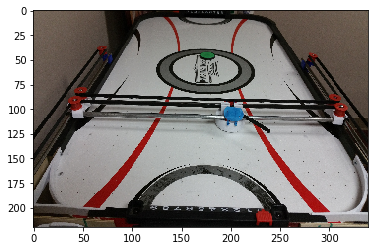

In [221]:
img = cv2.imread("2.jpg");
img=cv2.resize(img,(340,220))
image = cv2.cvtColor(img, cv2.COLOR_BGR2RGB);
plt.imshow(image);

In [222]:
pucklowerBound=np.array([70,80,50])
puckupperBound=np.array([95,255,180])

#botlowerBound=np.array([136,126,67])
#botupperBound=np.array([172,217,162])
#botlowerBound=np.array([95,220,160])
#botupperBound=np.array([110,240,180])
botlowerBound=np.array([95,15,165])
botupperBound=np.array([110,30,180])

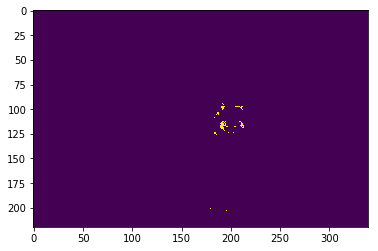

In [223]:
imgHSV = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
puckMask=cv2.inRange(imgHSV,pucklowerBound,puckupperBound)
botMask=cv2.inRange(imgHSV,botlowerBound,botupperBound)
plt.imshow(botMask)

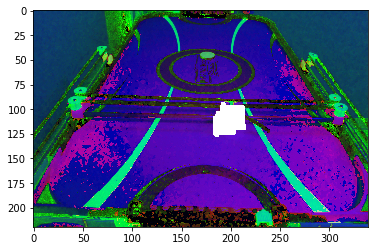

In [227]:
#plt.imshow(imgHSV[118:125, 195:210, :])
#print(imgHSV[118:125, 195:210, :])
plotted = imgHSV.copy()
#plotted[110:150, 175:225, :] = (255, 255,255)
#plt.imshow(plotted)
for i in range(botMask.shape[0]):
    for j in range(botMask.shape[1]):
        if maskCloseCleaned[i,j]:
            plotted[i,j] = (255, 255, 255)
plt.imshow(plotted)

#plt.imshow(botMask)


In [224]:
kernelOpen=np.ones((5,5))
kernelClose=np.ones((20,20))

In [225]:
maskOpen=cv2.morphologyEx(botMask,cv2.MORPH_OPEN,kernelOpen)
maskClose=cv2.morphologyEx(botMask,cv2.MORPH_CLOSE,kernelClose)

In [226]:
points = []
for i in range(maskClose.shape[0]):
    for j in range(maskClose.shape[1]):
        if maskClose[i, j] == 255:
            points.append((i,j))
#Remove exterior dots
padding = 2
from collections import deque
remaining_points = set(points)
saved_locations = []
while remaining_points:
    current_point = remaining_points.pop()
    y = current_point[0]
    x = current_point[1]
    saved_points = set()
    horizon = deque([(y-1,x-1),(y+1,x-1),(y-1,x+1),(y+1,x+1)])
    saved_points.add(current_point)
    while(len(horizon) > 0):
        to_check = horizon.pop()
        y = to_check[0]
        x = to_check[1]
        if to_check in remaining_points:
            remaining_points.discard(to_check)
            horizon.appendleft((y-1,x-1))
            horizon.appendleft((y+1,x-1))
            horizon.appendleft((y-1,x+1))
            horizon.appendleft((y+1,x+1))
            saved_points.add(to_check)
    saved_locations.append(saved_points)
maskCloseCleaned = maskClose.copy()
maskCloseCleaned[:,:] = 0
max_location = set()
for location in saved_locations:
    if location:
        if len(location) > len(max_location):
            max_location = location

for y, x in max_location:
    maskCloseCleaned[y-padding:y+padding,x-padding:x+padding] = 255

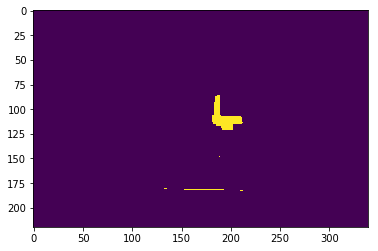

In [217]:
plt.imshow(maskClose)

In [136]:
maskFinal=maskClose
_, conts, _=cv2.findContours(maskFinal.copy(),cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_NONE)

In [137]:
contour_sizes = [(cv2.contourArea(contour), contour) for contour in conts]
biggest_contour = max(contour_sizes, key=lambda x: x[0])[1]

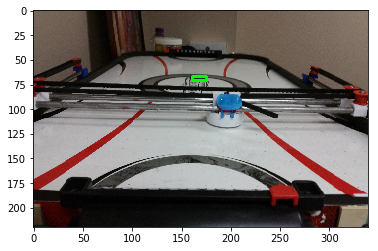

In [138]:
x,y,w,h = cv2.boundingRect(biggest_contour)
cv2.rectangle(image,(x,y),(x+w,y+h),(0,255,0),2)
plt.imshow(image)